In [4]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

In [5]:
df=pd.read_excel('C:/Users/shubham.chhetri/Desktop/MYPROJECT/Python/Residual.xlsx')    

In [8]:
df
df.columns=['student','sales']

In [10]:
reg=ols(formula="sales ~ student",data=df)
fit=reg.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Sat, 06 Jun 2020   Prob (F-statistic):           2.55e-05
Time:                        15:02:39   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.0000      9.226      6.503      0.0

C:\Users\shubham.chhetri\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [11]:
print(anova_lm(fit))

           df   sum_sq   mean_sq          F    PR(>F)
student   1.0  14200.0  14200.00  74.248366  0.000025
Residual  8.0   1530.0    191.25        NaN       NaN


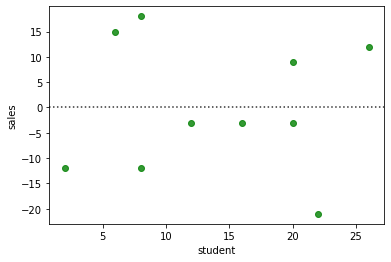

In [12]:
import seaborn as sns
sns.residplot(df['student'],df['sales'],color="g")

In [13]:
influence=fit.get_influence()
resid_student=influence.resid_studentized_external

In [14]:
resid_student

array([-1.09212653,  1.26798654, -0.94196706,  1.54023214, -0.21544891,
       -0.21544891, -0.22263461,  0.68766487, -2.01063738,  1.09212653])

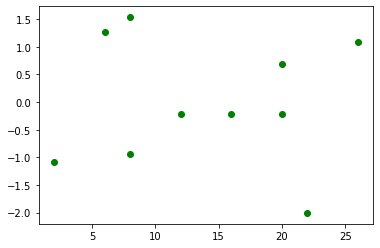

In [15]:
plt.figure()
plt.scatter(df['student'],resid_student,color="green")

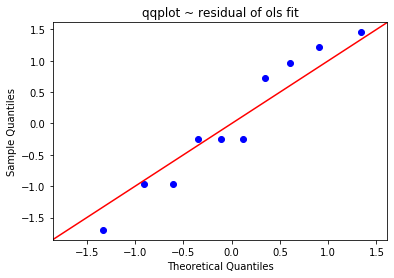

In [16]:
from scipy import stats
import statsmodels.api as sm
res=fit.resid  #residual
probplot=sm.ProbPlot(res,stats.norm,fit=True)
fig=probplot.qqplot(line='45')
h=plt.title('qqplot ~ residual of ols fit')
plt.show()
